### Simple linear regression
using the car price prediction dataset.


Though the dataset has mutliple variables,
let's use one variable each time.

In [2]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("./datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Checking for the missing values and data cleaning

In [10]:
df.isna().sum()
df.describe()
df.shape

(205, 26)

As observed from above results, all cells have valid observations. All the features are continuous. 

### Exploratory Data Analysis
Checking for normality > finding significant correlations

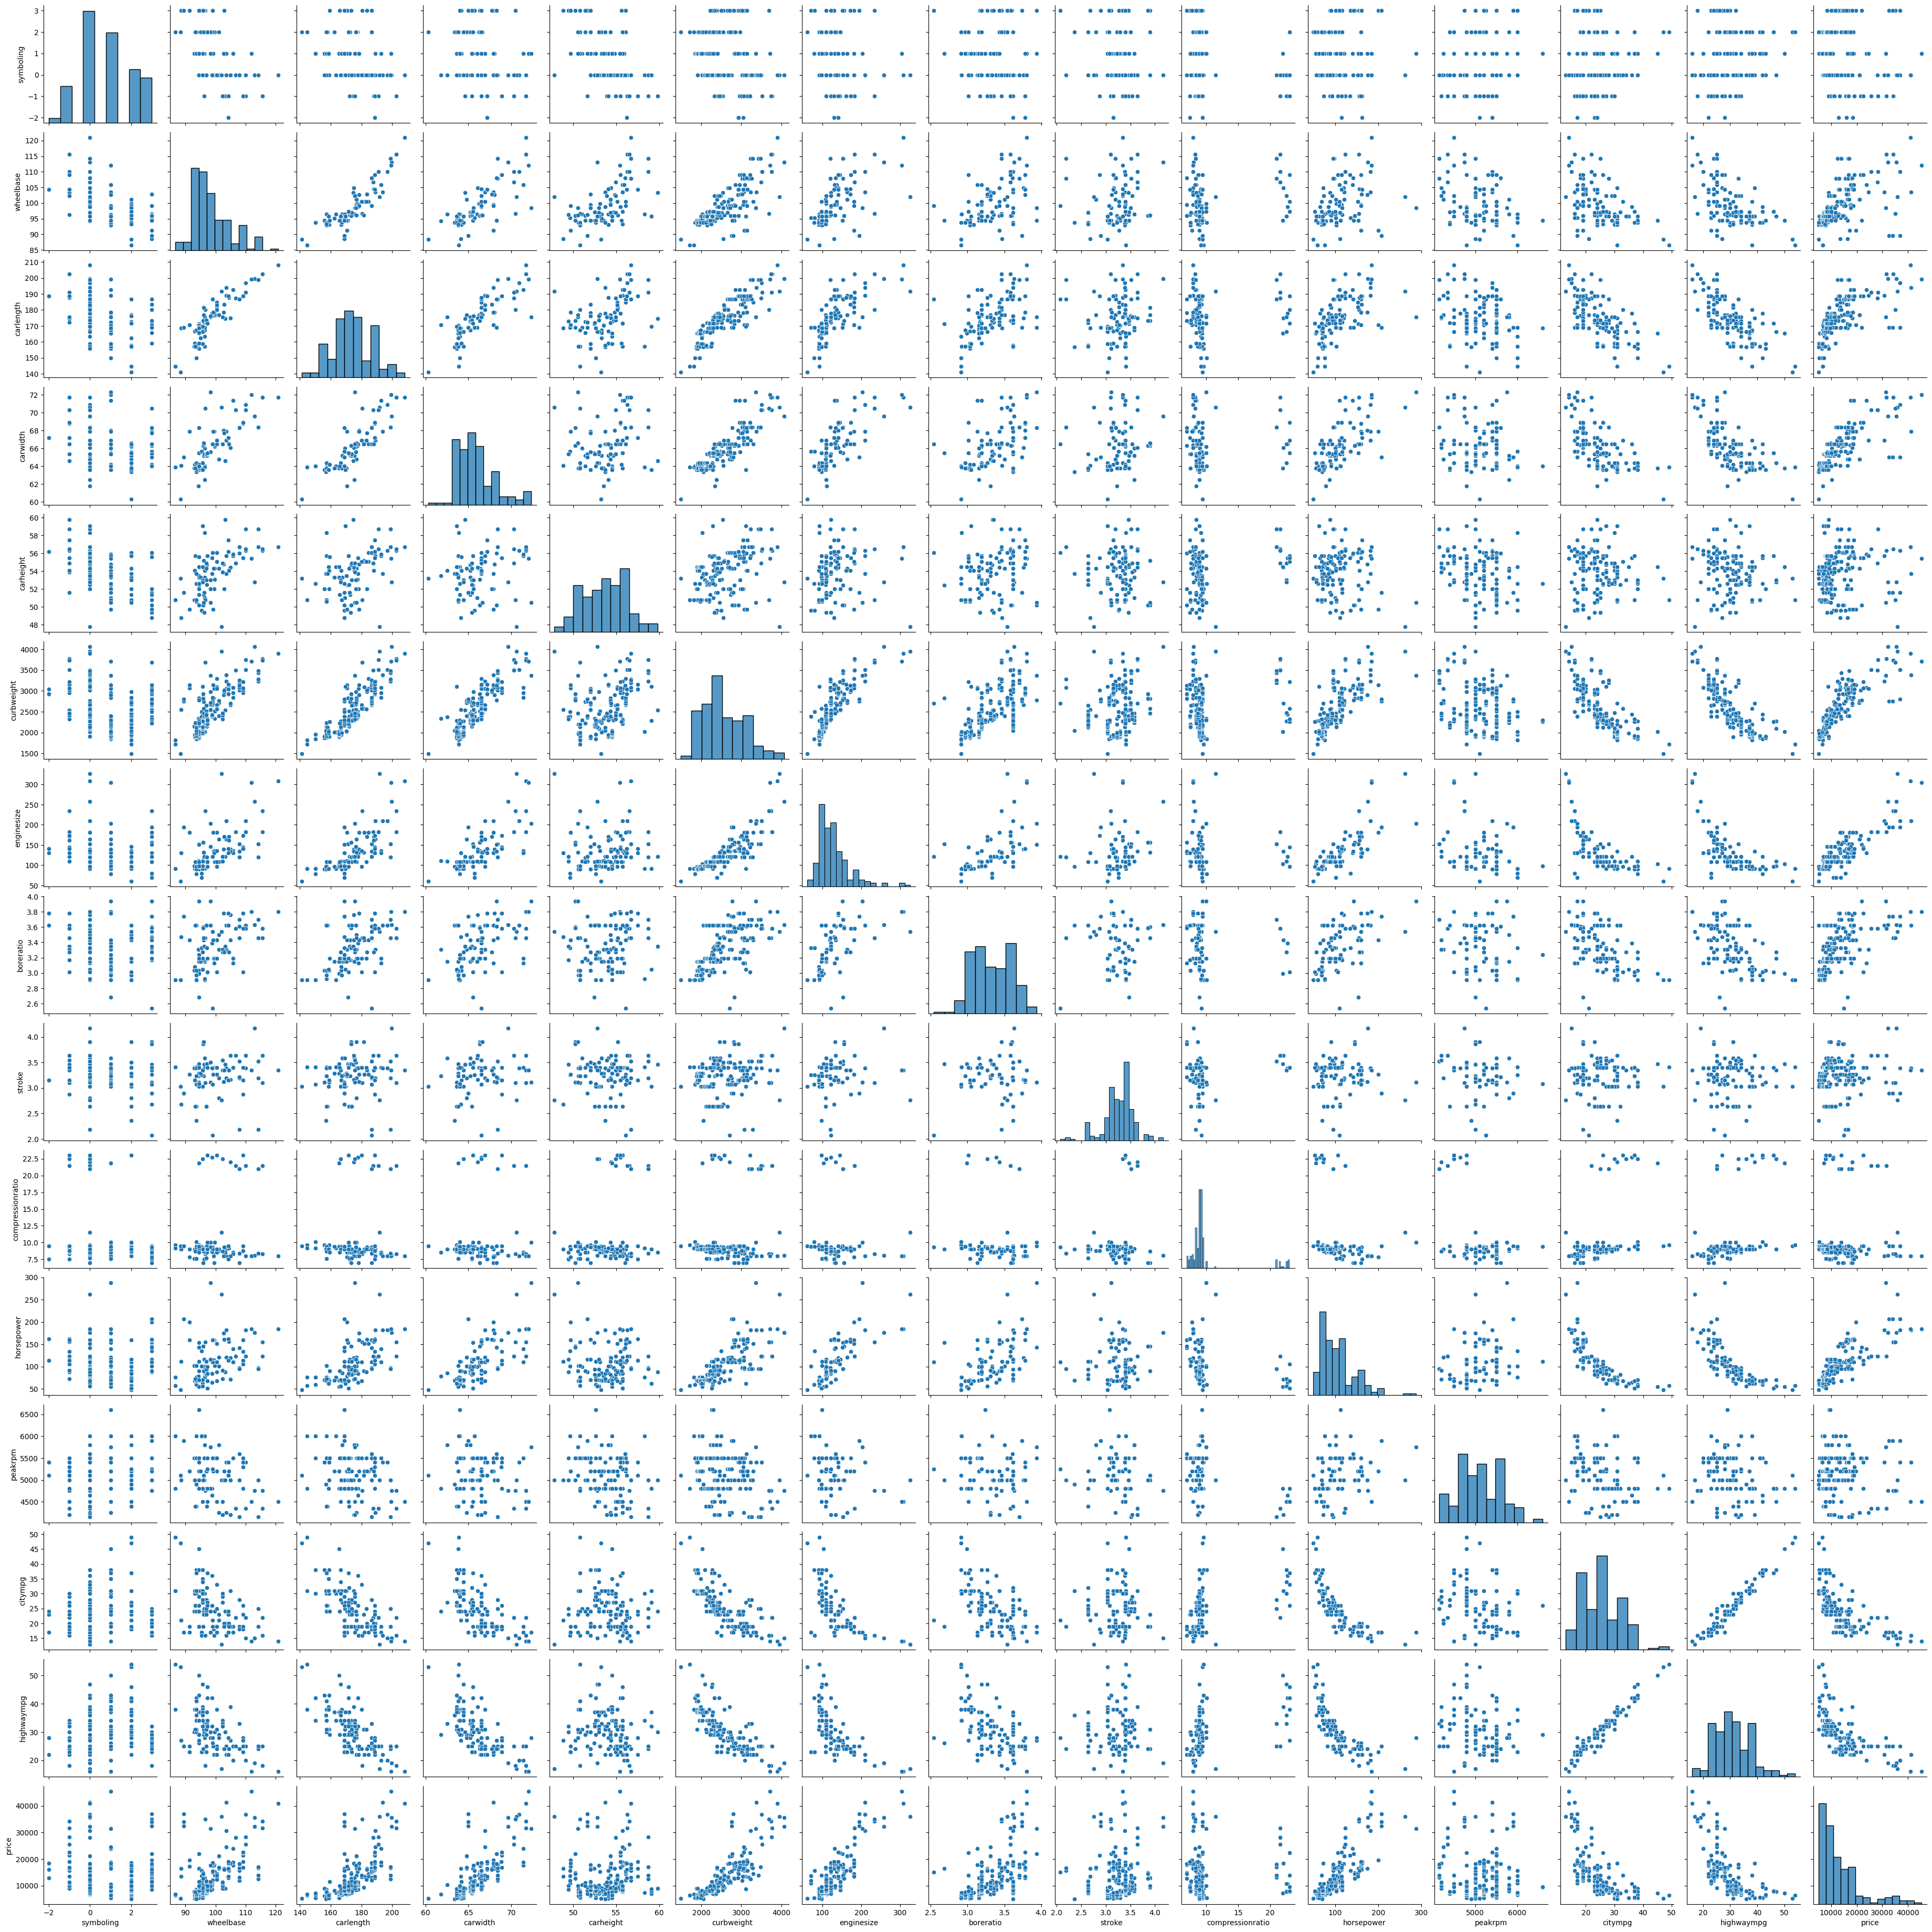

In [11]:
import seaborn as sns
df.drop(columns=["car_ID"], axis=1, inplace=True)
sns.pairplot(df)

As observed, a linear relationship may exist between price and engine size. Let us create a simple
linear regression model


In [17]:
df_new = df[["price", "enginesize"]]
df_new.head()

,price,enginesize
0,13495.0,130
1,16500.0,130
2,16500.0,152
3,13950.0,109
4,17450.0,136


In [19]:
df_new.corr()

,price,enginesize
price,1.000000,0.874145
enginesize,0.874145,1.000000


A positive correlation has been identified

Text(0, 0.5, 'Price of the car')

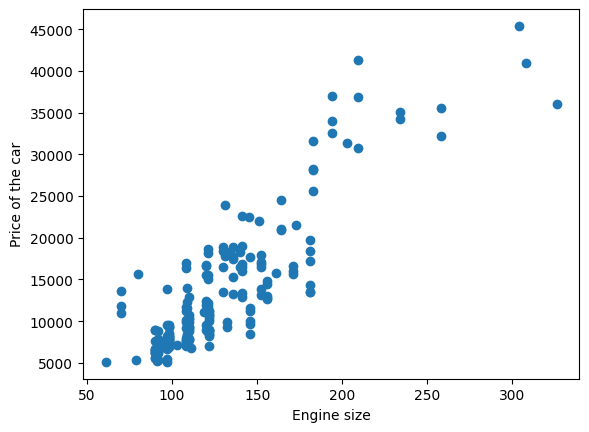

In [21]:
plt.scatter(df_new["enginesize"], df_new["price"])
plt.xlabel("Engine size")
plt.ylabel("Price of the car")

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
#splitting data
X = df_new[["enginesize"]]
y = df_new[["price"]]
X.shape


(205, 1)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1987)
xtrain.shape

(164, 1)

(array([ 6., 71., 36., 25., 13.,  6.,  2.,  2.,  0.,  3.]),
 array([-1.52475494, -0.93219615, -0.33963736,  0.25292144,  0.84548023,
         1.43803902,  2.03059781,  2.6231566 ,  3.21571539,  3.80827418,
         4.40083297]),
 <BarContainer object of 10 artists>)

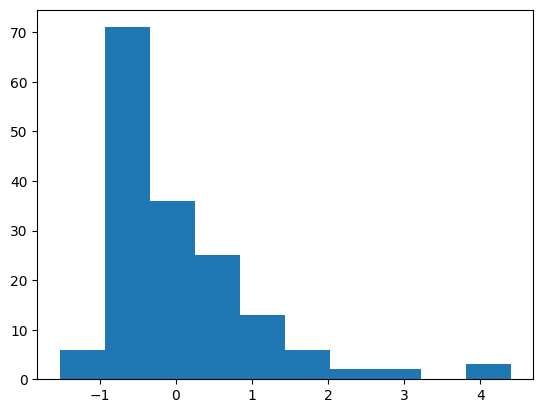

In [30]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
plt.hist(np.array(xtrain))

Some skewed data. Let us first fit using the original data

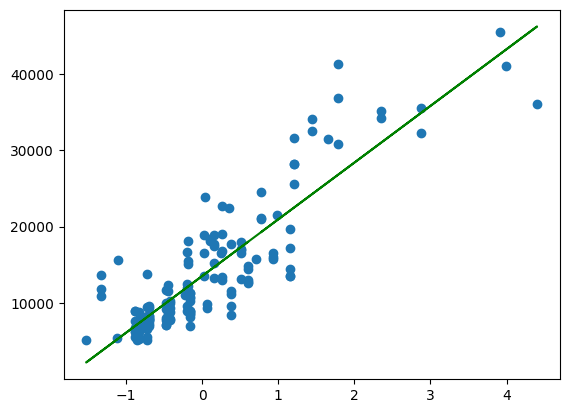

In [37]:
regression = LinearRegression(fit_intercept=True, n_jobs = -1)
regression.fit(xtrain,ytrain)

plt.plot(xtrain, regression.predict(xtrain), "g")
plt.scatter(xtrain, ytrain)

In [33]:
#metrics
ypred = regression.predict(xtest)
mse = mean_squared_error(ytest,ypred)
mae = mean_absolute_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

In [34]:
print(f"Mean squared error: {mse}\nMean absolute error: {mae}\nR2: {r2}")

Mean squared error: 13519189.684519757
Mean absolute error: 2691.853061748008
R2: 0.6089402062754005


In [36]:
print(f"Regression coefficient: {regression.coef_}\nIntercept: {regression.intercept_}")

Regression coefficient: [[7420.37056548]]
Intercept: [13525.78963415]


As we did not get a good fit, let us improve the prediction
by using data transformation. X is positively skewed, so let us 
try log transformation

In [38]:
df_new.head()

,price,enginesize
0,13495.0,130
1,16500.0,130
2,16500.0,152
3,13950.0,109
4,17450.0,136


(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

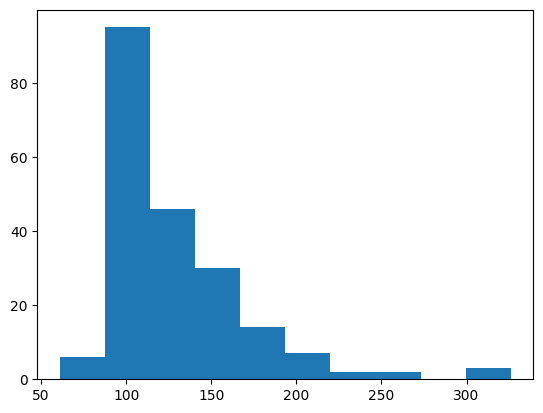

In [39]:
plt.hist(df_new["enginesize"])

C:\Users\srira\AppData\Local\Temp\ipykernel_33364\3440591418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["x_log"] = np.log10(df_new["enginesize"])


(array([ 4.,  2., 60., 36., 52., 23., 17.,  4.,  4.,  3.]),
 array([1.78532984, 1.85811861, 1.93090739, 2.00369616, 2.07648494,
        2.14927372, 2.22206249, 2.29485127, 2.36764005, 2.44042882,
        2.5132176 ]),
 <BarContainer object of 10 artists>)

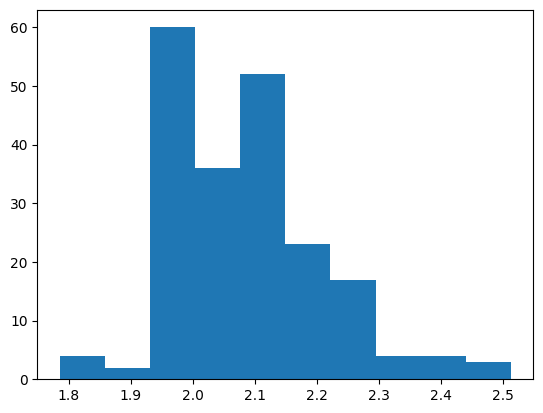

In [40]:
df_new["x_log"] = np.log10(df_new["enginesize"])
plt.hist(df_new["x_log"])

In [43]:
skew1 = df_new["enginesize"].skew()
skew2 = df_new["x_log"].skew()
print(f"skewness before: {skew1:.4f}\nSkewness after log transformation: {skew2:.4f}")

skewness before: 1.9477
Skewness after log transformation: 0.8578


Let us fit a regression with this new transformed data

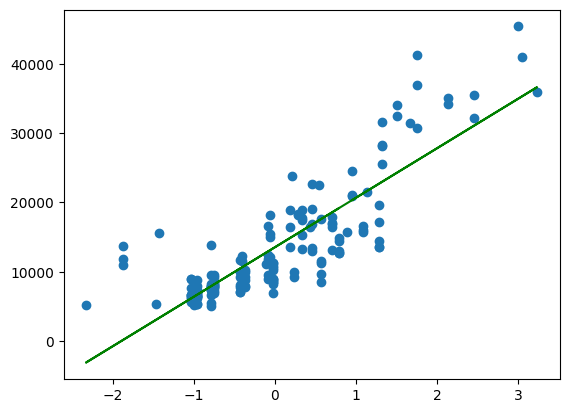

In [44]:
regression2 = LinearRegression(fit_intercept=True, n_jobs = -1)
Xnew = df_new[["x_log"]]
ynew = df_new[["price"]]
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(Xnew, ynew, test_size=0.2, random_state=1987)
scaler2 = StandardScaler()
xtrain2 = scaler2.fit_transform(xtrain2)
xtest2 = scaler2.transform(xtest2)
regression2.fit(xtrain2,ytrain2)

plt.plot(xtrain2, regression2.predict(xtrain2), "g")
plt.scatter(xtrain2, ytrain2)

In [46]:
ypred2 = regression.predict(xtest2)
mse2 = mean_squared_error(ytest2,ypred2)
mae2 = mean_absolute_error(ytest2,ypred2)
rmse2 = np.sqrt(mse2)
r2_new = r2_score(ytest2, ypred2)
print(f"Regression coefficient: {regression2.coef_}\nIntercept: {regression2.intercept_}")

Regression coefficient: [[7148.88247654]]
Intercept: [13525.78963415]


In [47]:
## comparing metrics
print(f"Mean squared error: before: {mse}\t After: {mse2}\nMean absolute error: before: {mae}\t After: {mae2}\nR2: before: {r2}\t After: {r2_new}")


Mean squared error: before: 13519189.684519757	 After: 13074467.28549056
Mean absolute error: before: 2691.853061748008	 After: 2667.8511992092435
R2: before: 0.6089402062754005	 After: 0.6218043685282763


### Only a slight improvement is detected